In [15]:
#import libraries
import pandas as pd
import numpy as np
import warnings 
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

warnings.filterwarnings("ignore") 

In [2]:
#import data
data = pd.read_csv(r'C:\Users\aarti\Downloads\uber.csv')
df = data.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [3]:
#pickup_datetime is not in required data format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [5]:
#Statistics of data
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
#Number of missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
#Drop the rows with missing values
df.dropna(inplace=True)

In [8]:
#Check the missing values now
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [23]:
#Calculatin the distance between the pickup and drop co-ordinates 
#using the Haversine formual for accuracy.
def haversine (lon_1, lon_2, lat_1, lat_2):
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [24]:
#find distance travelled per ride
df['Distance']= haversine(df['pickup_longitude'],df['dropoff_longitude'],
                             df['pickup_latitude'],df['dropoff_latitude'])

#round it to 2 decimal points
df['Distance'] = df['Distance'].astype(float).round(2) 
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'fare_amount')

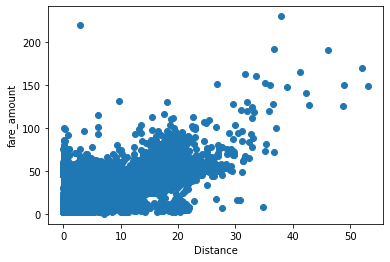

In [25]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [26]:
#Outliers
#We can get rid of the trips with very large distances that are outliers
# as well as trips with 0 distance.
df.drop(df[df['Distance'] > 60].index, inplace = True)
df.drop(df[df['Distance'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)
df.shape

(193481, 10)

In [27]:
# removing rows with non-plausible fare amounts and distance travelled
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )
df.shape

(193481, 10)

In [28]:
from sklearn.model_selection import train_test_split

x = df.drop("fare_amount", axis = 1)   #Take x as predictor variable
y = df['fare_amount']                  #And y as target variable

x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))
x = x.loc[:, x.columns.str.contains('^Unnamed')]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [29]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [11]:
#Prediction
predict = lrmodel.predict(x_test)

In [12]:
#Check Error
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE error for the model is ", lrmodelrmse)

RMSE error for the model is  9.9103858428844


In [13]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)

rfrmodel.fit(x_train, y_train)
rfrmodel_pred = rfrmodel.predict(x_test)

rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random Forest is:",rfrmodel_rmse)

RMSE value for Random Forest is: 11.975004032341012
